In [1]:
%matplotlib inline
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Select, SelectMultiple,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import umap.umap_ as umap
from ipywidgets import interact, IntSlider, fixed, FloatSlider
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
#поиск всех файлов в папке
files = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('music.csv',), value='music.csv')

In [4]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.columns = df.columns.str.strip()
df.fillna(0)
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


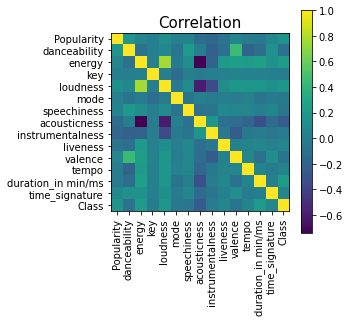

In [6]:
#корреляция 
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)
plt.show()

In [7]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(df.columns),
    value=[list(df.columns)[0]],
    description='Параметры: ',
    disabled=False
)
select

SelectMultiple(description='Параметры: ', index=(0,), options=('Artist Name', 'Track Name', 'Popularity', 'dan…

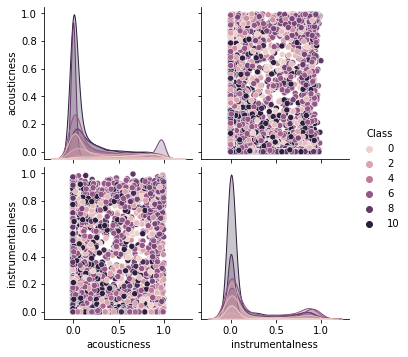

In [8]:
#все возможные пары
ddf = df[list(select.value)]
sns.pairplot(ddf,hue="Class")

In [9]:
def make_dict(series):
    keys = list(series.value_counts().keys())
    return keys, {keys[i]:i for i in range(len(keys))}

def draw_projections(data, columns):
    fig = plt.figure(figsize=(10, 10))
    proj = '3d' if data.shape[1] == 3 else None
    a = math.ceil(math.sqrt(len(columns)))
    
    for i in range(len(columns)):
        keys, d = make_dict(df[columns[i]])
        colors = [sns.color_palette("husl", len(d))[x] for x in df[columns[i]].map(d)]
        subplot = fig.add_subplot(int(f'{a}{a}{i + 1}'), projection=proj)
        
        if data.shape[1] == 1:
            subplot.scatter(data[:, 0], c=colors)
        elif data.shape[1] == 2:
            subplot.scatter(data[:, 0], data[:, 1], c=colors)
        elif data.shape[1] == 3:
            subplot.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors) 
            
        subplot.title.set_text(f"UMAP projection by {columns[i]}")
            
        patches = [mpatches.Patch(color=sns.color_palette("hls", len(d))[i], label=keys[i]) for i in range(len(keys))]

        subplot.legend(handles=patches, ncol=10, loc="lower center")

In [10]:
def draw_umap(data, columns, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', draw=True):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=42
    )
    
    result = fit.fit_transform(data)
    
    if draw:
        draw_projections(result, columns)
        plt.title(f"neighbors = {n_neighbors}, min_dist={min_dist}, components={n_components}, metric={metric}")
    
    return result

In [11]:
select

SelectMultiple(description='Параметры: ', index=(0, 9, 10, 16), options=('Artist Name', 'Track Name', 'Popular…

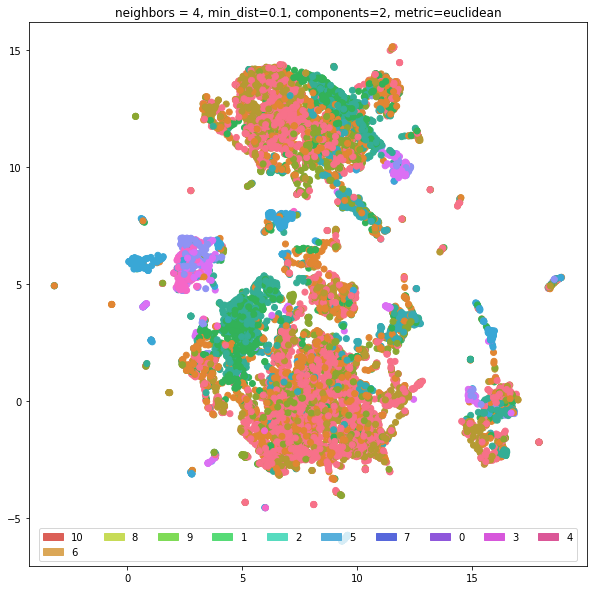

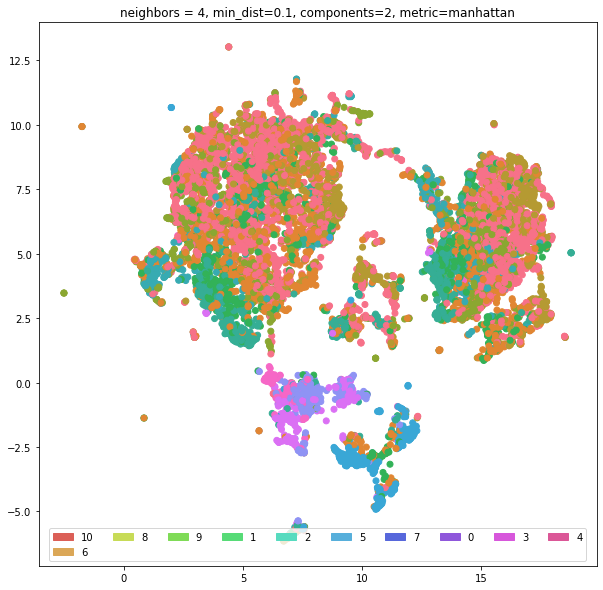

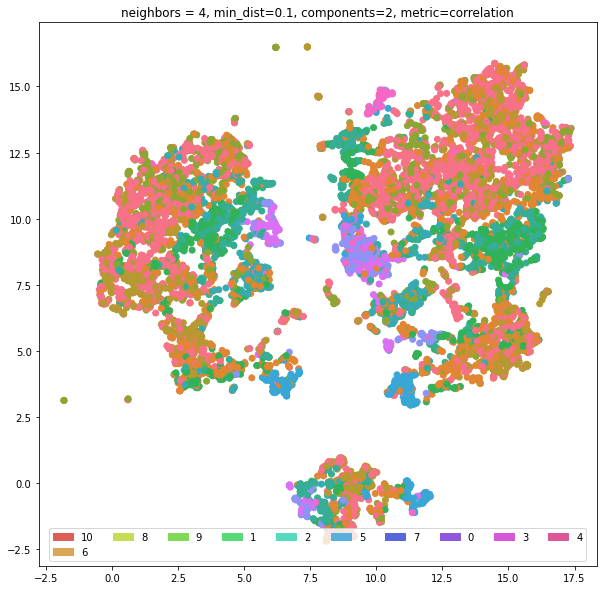

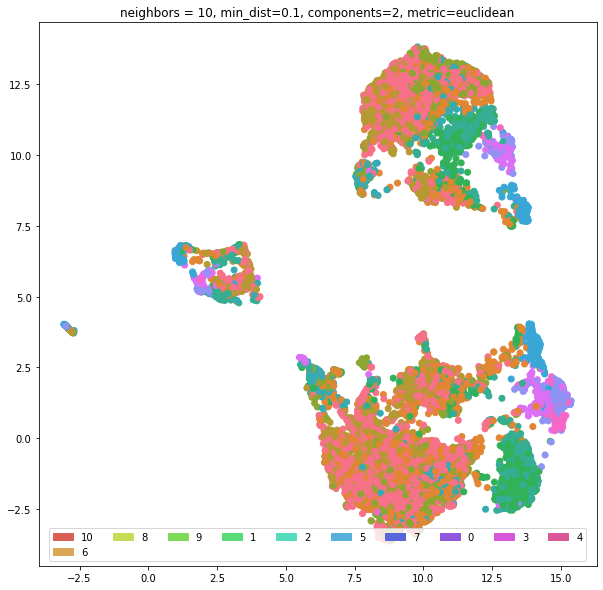

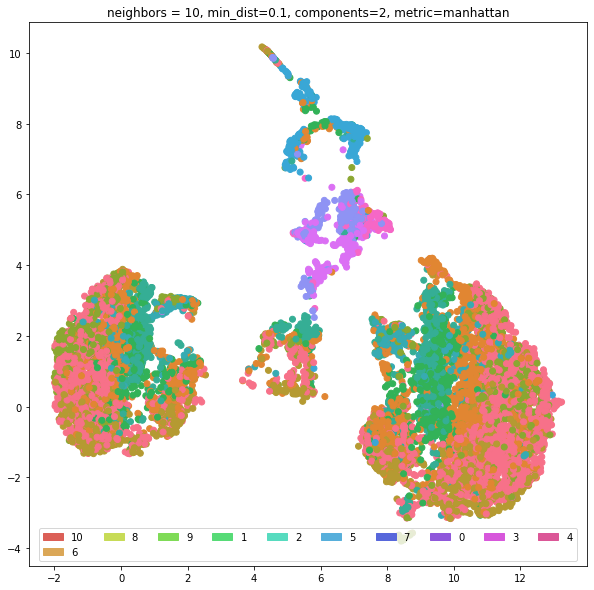

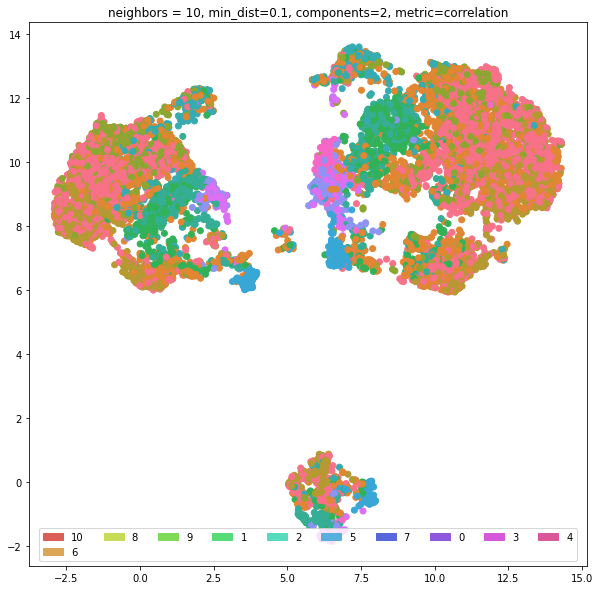

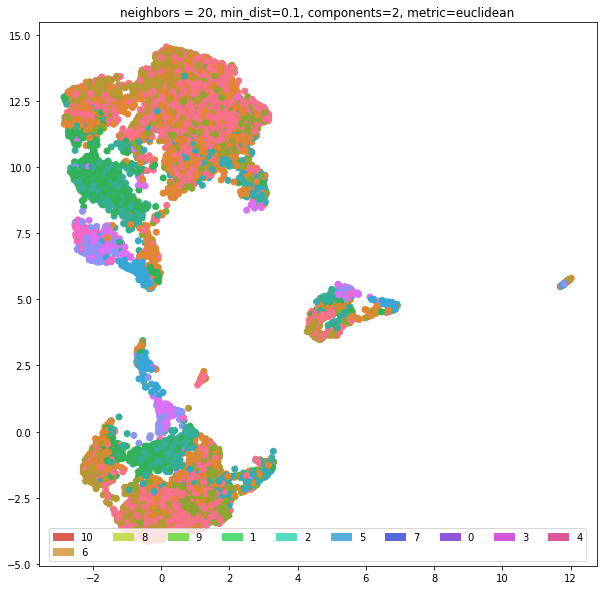

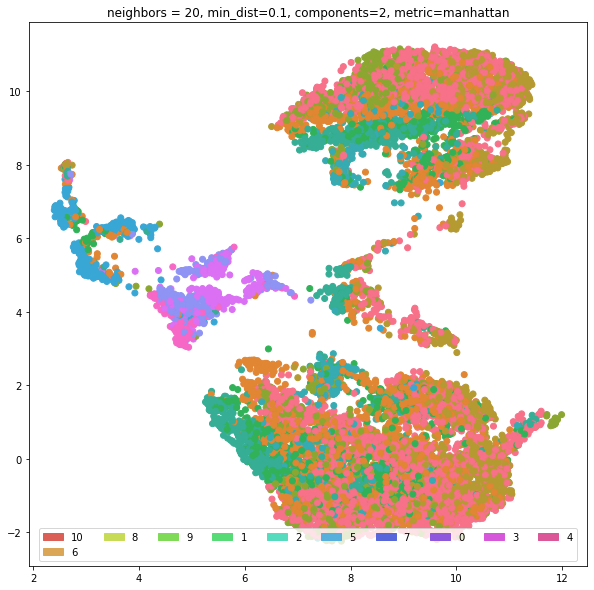

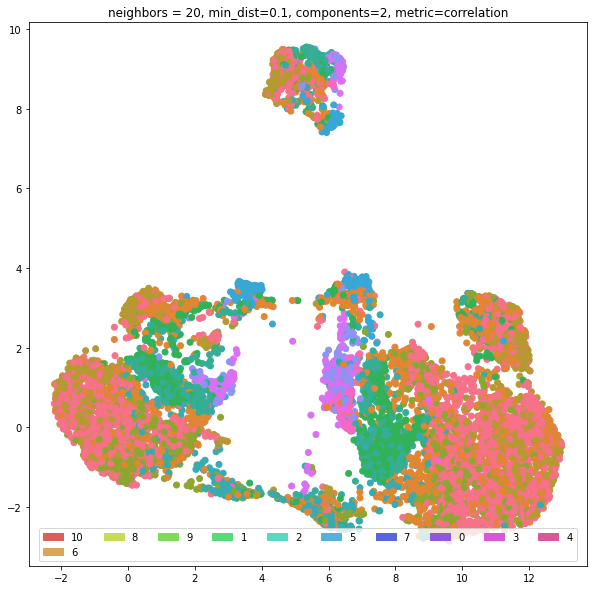

In [14]:
df = df.dropna()
df_data = df[
        list(select.value)
    ].values
# df_data = df_data[:1000]
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(df_data)

for i in [4, 10, 20]:
    draw_umap(scaled_data, ["Class"], n_neighbors=i, min_dist=0.1, n_components=2, metric='euclidean')
    draw_umap(scaled_data, ["Class"], n_neighbors=i, min_dist=0.1, n_components=2, metric='manhattan')
    draw_umap(scaled_data, ["Class"], n_neighbors=i, min_dist=0.1, n_components=2, metric='correlation')

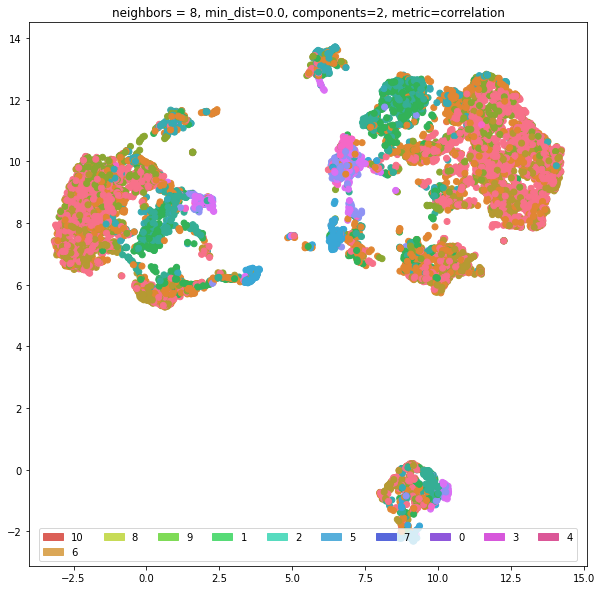

In [15]:
projection = draw_umap(scaled_data, ["Class"], n_neighbors=8, min_dist=0.0, n_components=2, metric='correlation')

In [16]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 10)

In [17]:
def draw_kmeans(n=2):
    kmeans = KMeans(n_clusters=n).fit(projection)

    fig, ax = plt.subplots(1,1)
    ax.scatter(projection[:,0], projection[:,1], c=kmeans.labels_)
    
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    plt.show()
    
interact(draw_kmeans, n=IntSlider(min=2,max=12,step=1,value=2));

interactive(children=(IntSlider(value=2, description='n', max=12, min=2), Output()), _dom_classes=('widget-int…

In [18]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

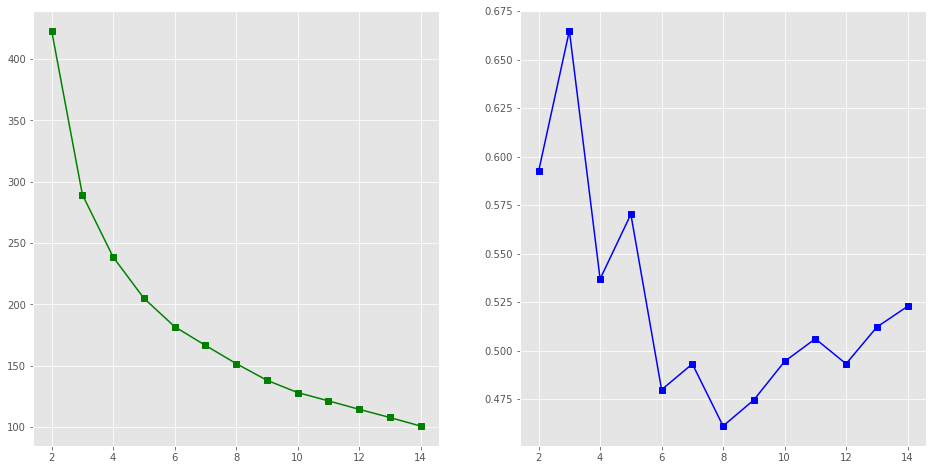

In [21]:
elbow = []
silhouette = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20).fit(projection)
    elbow.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(projection, kmeans.labels_))
    
fig, ax = plt.subplots(1, 2)
    
ax[0].plot(range(2,15), elbow, marker='s', c='g')
ax[1].plot(range(2,15), silhouette, marker='s', c='b')

plt.show()

In [20]:
def draw_dbscan(eps=1, min_pts=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(projection)

    fig, ax = plt.subplots(1,1)
    ax.scatter(projection[:,0], projection[:,1], c=dbscan.labels_)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    plt.show()
    
    clusters = set(dbscan.labels_)
    
interact(draw_dbscan, eps=FloatSlider(min=0.1, max=3, step=0.05, value=1), min_pts=IntSlider(min=2, max=15, step=1, value=5));

interactive(children=(FloatSlider(value=1.0, description='eps', max=3.0, min=0.1, step=0.05), IntSlider(value=…

[([-0.059946455, -0.059946455, -0.059946455, 0.24458402, 0.24458402, 0.23880677, 0.35327423, 0.37098125], 0.5), ([0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.39088938], 0.6), ([0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781], 0.7), ([0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781, 0.3139781], 0.8), ([0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339], 0.9), ([0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339], 1.0), ([0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339], 1.1), ([0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339], 1.2), ([0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339], 1.3), ([0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339, 0.4961339], 1.4), ([0.4302452, 0

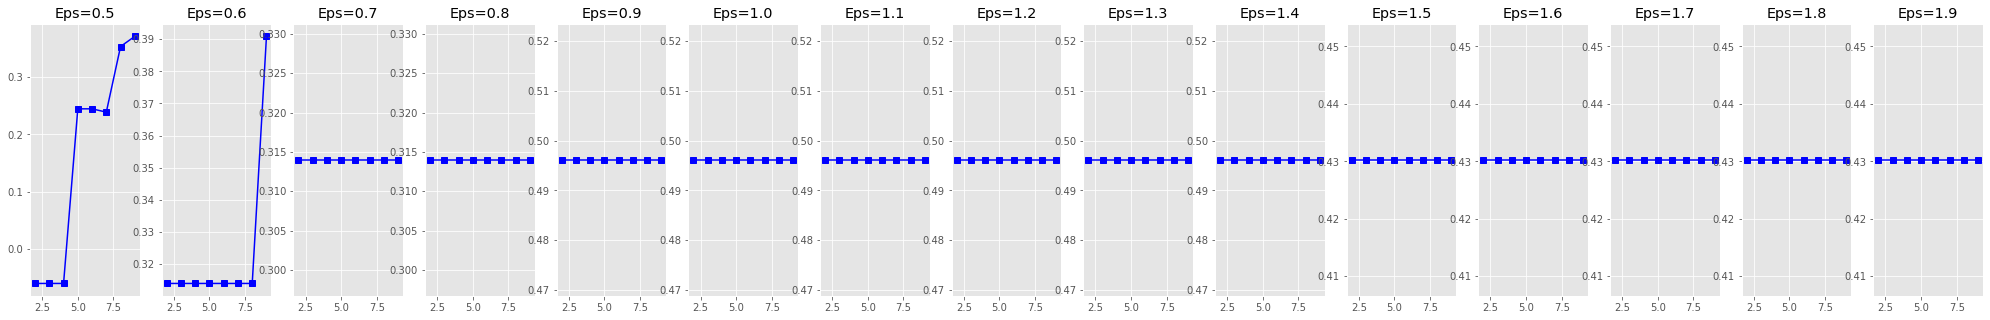

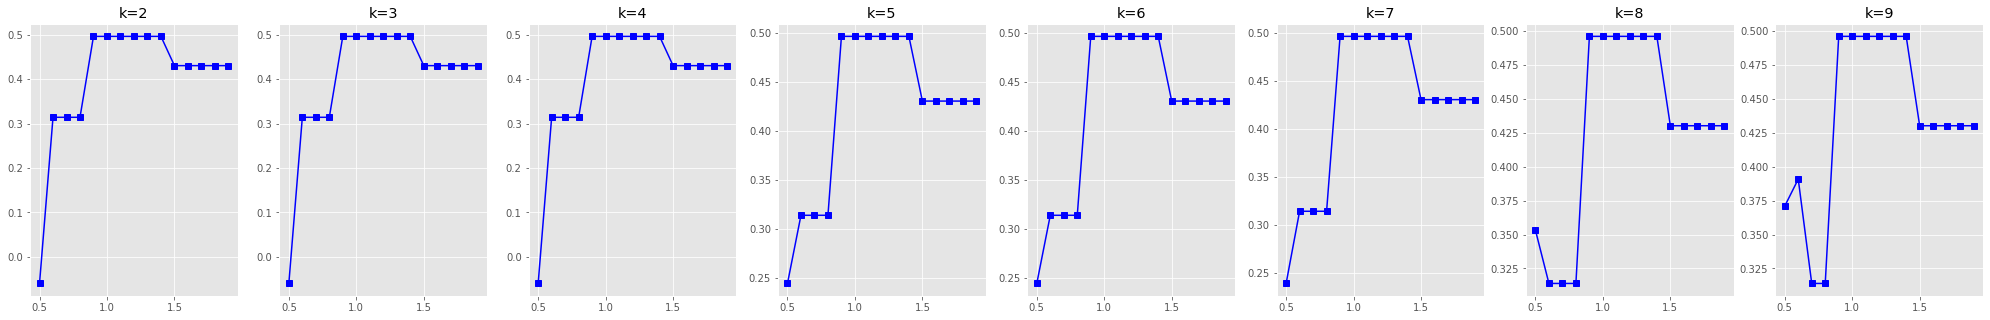

In [23]:
silhouette1 = []
silhouette2 = []

eps_range = [x / 100.0 for x in range(50, 200, 10)]
k_range = range(2, 10)

for e in eps_range:
    silhouette = []

    for k in k_range:
        dbscan = DBSCAN(eps=e, min_samples=k).fit(projection)
        silhouette.append(silhouette_score(projection, dbscan.labels_))

    silhouette1.append((silhouette, e))

print(silhouette1)

for k in k_range:
    silhouette = []

    for e in eps_range:
        dbscan = DBSCAN(eps=e, min_samples=k).fit(projection)
        silhouette.append(silhouette_score(projection, dbscan.labels_))
    
    silhouette2.append((silhouette, k))

print(silhouette2)

fig1, ax1 = plt.subplots(1, len(silhouette1), figsize=(35, 5))
fig2, ax2 = plt.subplots(1, len(silhouette2), figsize=(35, 5))
for i in range(len(silhouette1)):
    ax1[i].plot(k_range, silhouette1[i][0], marker='s', c='b')
    ax1[i].set_title(f"Eps={silhouette1[i][1]}")

for i in range(len(silhouette2)):
    ax2[i].plot(eps_range, silhouette2[i][0], marker='s', c='b')
    ax2[i].set_title(f"k={silhouette2[i][1]}")

plt.show()